In [150]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [152]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [153]:
df=df.drop_duplicates()

In [154]:
df.duplicated().sum()
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [155]:
#sex,Smoker
df.groupby(['sex','smoker']).agg({'smoker':'count'})

smoker
sex    smoker        
female no         547
       yes        115
male   no         516
       yes        159

In [156]:
sex=df['sex'].value_counts();sex
smoker=df['smoker'].value_counts();smoker
region=df['region'].value_counts();region

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

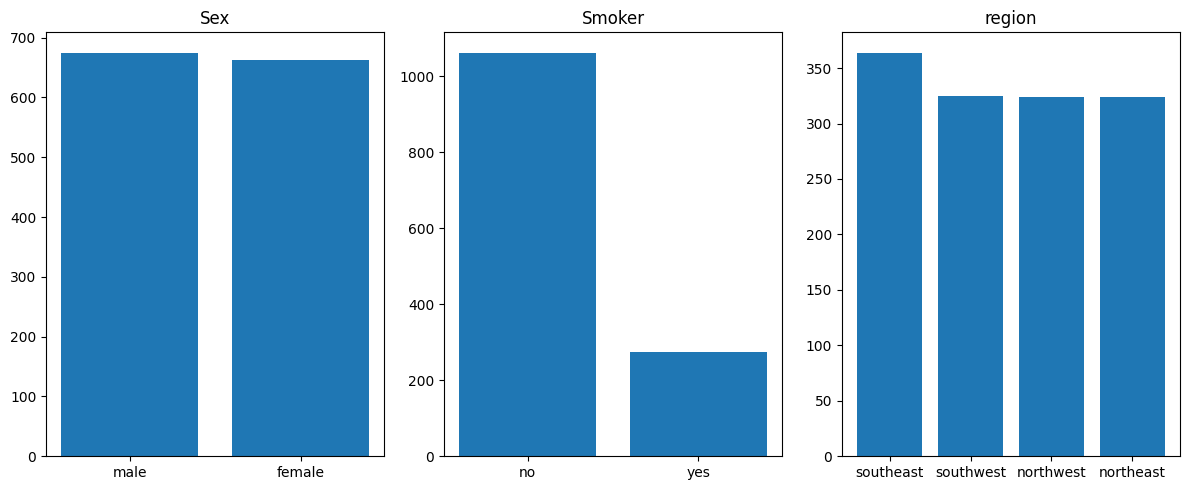

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,axis= plt.subplots(1,3,figsize=(12,5))
axis[0].bar(sex.index,sex.values)
axis[0].set_title('Sex')
axis[1].bar(smoker.index,smoker.values)
axis[1].set_title('Smoker')
axis[2].bar(region.index,region.values)
axis[2].set_title('region')
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='Count'>

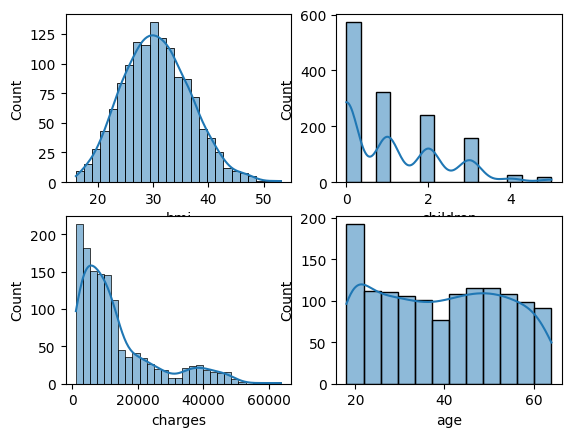

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes=plt.subplots(2,2)
axes=axes.flatten()
sns.histplot(df['bmi'],kde=True,ax=axes[0])
sns.histplot(df['children'],kde=True,ax=axes[1])
sns.histplot(df['charges'],kde=True,ax=axes[2])
sns.histplot(df['age'],kde=True,ax=axes[3])

<Axes: ylabel='age'>

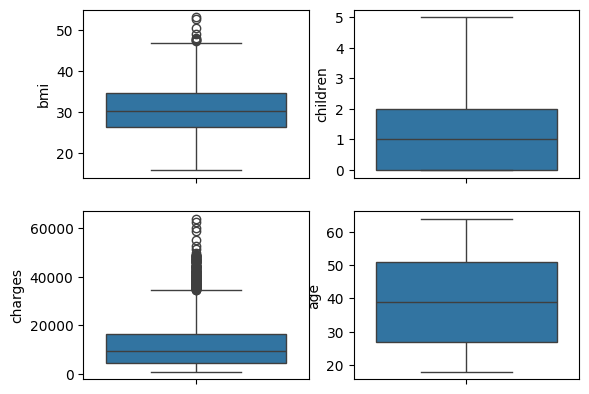

In [ ]:
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
fig, axes=plt.subplots(2,2)
axes=axes.flatten()
sns.boxplot(df['bmi'],ax=axes[0])
sns.boxplot(df['children'],ax=axes[1])
sns.boxplot(df['charges'],ax=axes[2])
sns.boxplot(df['age'],ax=axes[3])

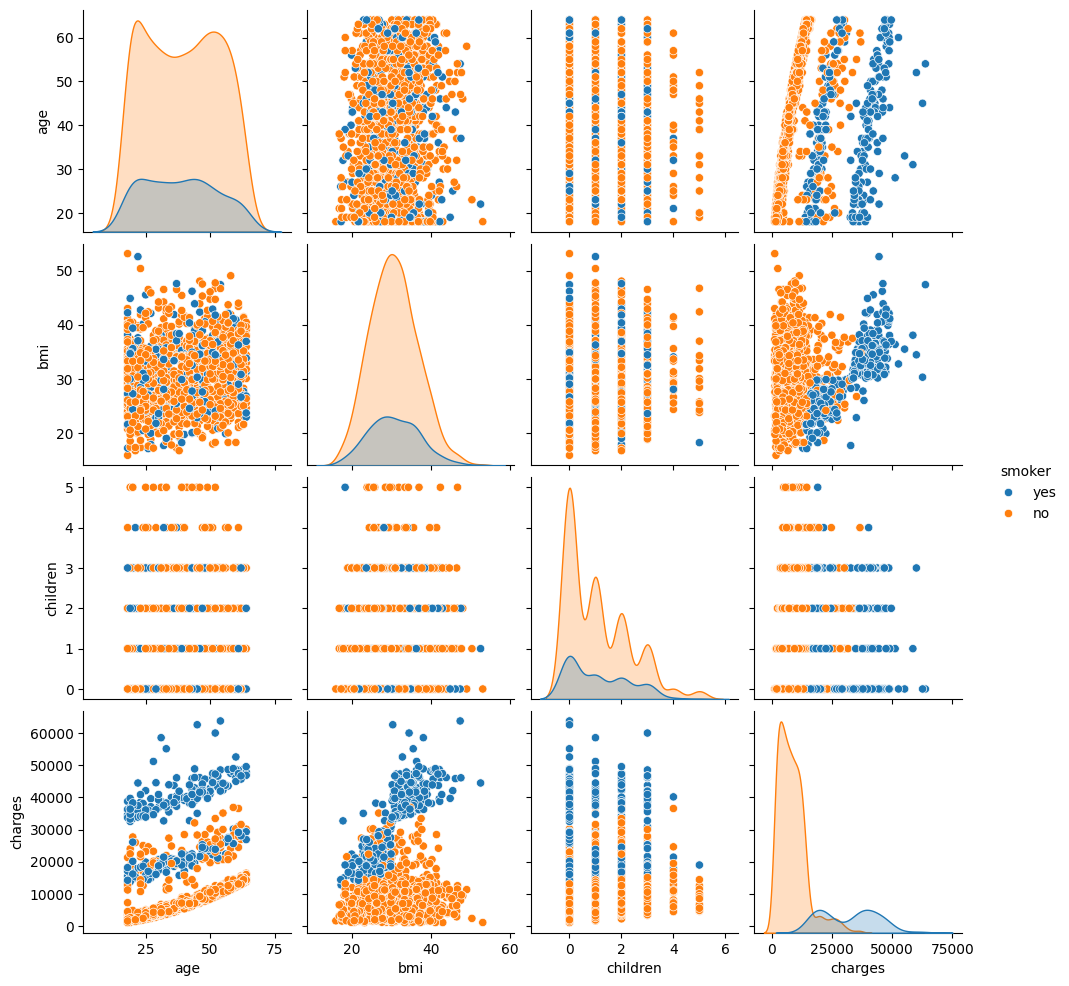

In [160]:
sns.pairplot(df,hue='smoker')

In [161]:
from sklearn.preprocessing import LabelEncoder
df['sex']=LabelEncoder().fit_transform(df['sex'])
df['region']=LabelEncoder().fit_transform(df['region'])
df['smoker']=LabelEncoder().fit_transform(df['smoker'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_1012\1922649606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=LabelEncoder().fit_transform(df['sex'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1012\1922649606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['region']=LabelEncoder().fit_transform(df['region'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_1012\1922649606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [162]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<Axes: >

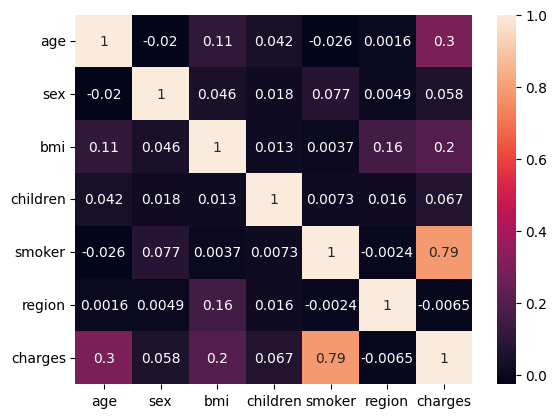

In [163]:
sns.heatmap(cor,annot=True)

<Axes: xlabel='smoker', ylabel='count'>

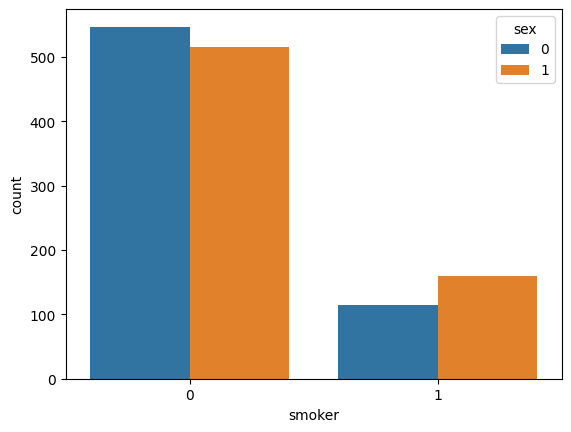

In [164]:
sns.countplot(x=df['smoker'],hue=df['sex'])


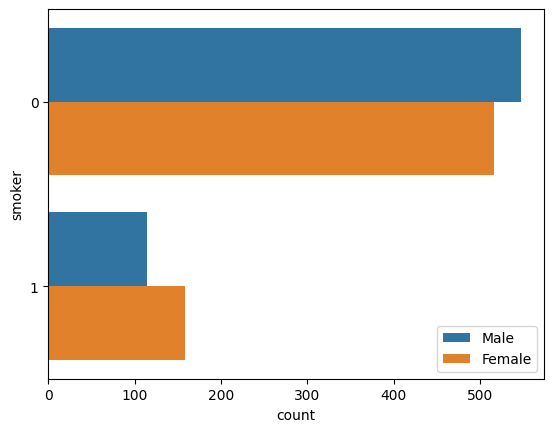

In [165]:
sns.countplot(y=df['smoker'],hue=df['sex'])
plt.legend(['Male','Female'])